In [135]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Disaster Data Exploration

In [301]:
df = pd.read_excel(os.getcwd()+'/disasters.xlsx')
df.head()

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077091,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077091,NaN,NaN,NaN,NaN
2,1901-0003-BEL,1901,3,NaN,Technological,Technological,Industrial accident,Explosion,NaN,Coal mine,...,NaN,NaN,NaN,NaN,NaN,3.077091,NaN,NaN,NaN,NaN
3,1902-0012-GTM,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,25000.0,781207.0,3.200175,NaN,NaN,NaN,NaN
4,1902-0003-GTM,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,3.200175,NaN,NaN,NaN,NaN


In [303]:
df.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

## Getting the frequency dataframe

In [310]:
frequency_per_country = pd.DataFrame(df.groupby('Country').count()['Start Year'])
frequency_per_country = frequency.rename({'Start Year':'count'},axis=1)
display(frequency_per_country.head())

,count
Country,
Afghanistan,259
Albania,50
Algeria,149
American Samoa,6
Angola,122


## Plotting Data to Visualize

In [27]:
#Plotting categorical data
categorical_columns = ['Disaster Group', 'Disaster Subgroup','Disaster Type','Disaster Subtype', 'Disaster Subsubtype', 'Event Name']
def barplot(df,column_name):
    plt.figure(figsize=(15,5))
    df2 = df.dropna(subset=[column_name])
    df2[column_name].value_counts().plot(kind='bar',)
    plt.ylabel('Count')
    plt.xlabel(df2[column_name].name);
    plt.title(f'{df2[column_name].name} Type')
# for col in categorical_columns:
#     barplot(df,col)
   

In [ ]:
#Plotting numerical columns
numerical_columns = ['Start Year', 'Start Month','Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', "Reconstruction Costs ('000 US$)",
       "Reconstruction Costs, Adjusted ('000 US$)",
       "Insured Damages ('000 US$)", "Insured Damages, Adjusted ('000 US$)",
       "Total Damages ('000 US$)", "Total Damages, Adjusted ('000 US$)", 'CPI']
def histplot(df,column_name):
    plt.figure(figsize=(15,5))
    df2 = df.dropna(subset=[column_name])
    df2[column_name].value_counts().plot(kind='hist',)
    plt.ylabel('Count')
    plt.xlabel(df2[column_name].name);
    plt.title(f'{df2[column_name].name} Type')
for col in numerical_columns:
     histplot(col)

## Getting % null values for main variable of interest

In [143]:
#Trying to find if there's a pattern to the missing values
df['Year_Duration'] = df['End Year'] - df['Start Year']
null_deaths = df[df['Total Deaths'].isna()]
null_deaths.groupby("Country").count()['Dis No'].sort_values(ascending=False)[:50]


Country
United States of America (the)                                394
China                                                         227
Philippines (the)                                             188
Indonesia                                                     144
Australia                                                     135
Russian Federation (the)                                       97
Canada                                                         92
India                                                          84
Hong Kong                                                      82
France                                                         70
Mexico                                                         68
Japan                                                          67
Brazil                                                         60
New Zealand                                                    59
Colombia                                                       53
Th

In [144]:
print(f"Percent null of deaths in original: {round(df.isna().sum()['Total Deaths']/df.shape[0]*100,2)}")

Percent null of deaths in original: 20.97


<AxesSubplot:xlabel='Start Year'>

<AxesSubplot:xlabel='Start Year'>

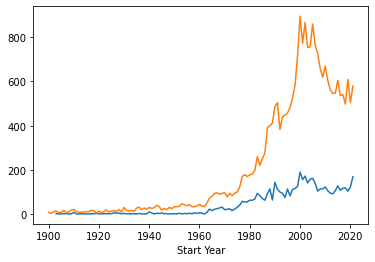

In [113]:
#Plotting null values per year (blue) vs total values per year (orange)
display(pd.DataFrame(null_deaths.groupby('Start Year').count())['Year'].plot())
display(pd.DataFrame(df.groupby('Start Year').count())['Year'].plot())

It seems that the presence of null values diminished overtime, especially until mid 2000s, which although it remained almost the same, its presence slightly increased.

Below is the # of null values to total values per year.

The distribution seems to have increased after the 60s. However this could be due to more disasters being reported after the 60s across the world compared to before, however the total deaths not being reported as well. Because we're interested in climate change analysis, it makes more sense to keep as much data as possible despite improvement in the 90s and especially in the 2000s


<AxesSubplot:xlabel='Start Year'>

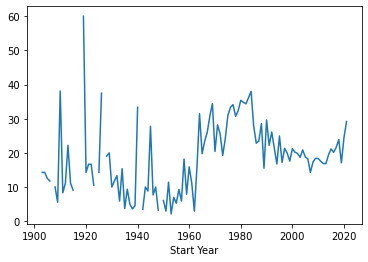

In [165]:
(null_deaths.groupby('Start Year').count()['Year']/df.groupby('Start Year').count()['Year']*100).plot()

## Total vs Null per Region per Year
Orange null and blue total

In [208]:
region_list = null_deaths['Region'].value_counts().index
def plotregion_time(df1,df2,col,region):
    fig = plt.subplots(figsize=(20,10))
    dfplot = pd.DataFrame(df1[df1['Region']==region].groupby('Start Year').count()['Year'])
    df2plot = pd.DataFrame(df2[df2['Region']==region].groupby('Start Year').count()['Year'])
    plt.plot(dfplot.index,dfplot[col])
    plt.plot(df2plot.index,df2plot[col])
    plt.title(region)

# for region in region_list:
#     plotregion_time(df1=df,df2=null_deaths,col='Year',region=region)

Southeastern Asia and Eastern Asia and Western Asia and Central America and Middle Africa is in line with the overall graph with %null total death values decreasing in proportion to total after the 80s<br><br>
North America is inline overall - the proportion only decreases after the 2000s The null values start at 70s, which means it started to likely add in more disasters even if there were null values, which could signal 70s to be the better start year to choose from.<br><br>
South America and Eastern Africa started to add in more null values in the 60s, however the trend is in line with the Asian countries with more disasters overall being reported and null deaths decreasing in proportion, however the proportion increases after the mid 2000s. Southern Africa has a similar trend although is starts in the 90s. <br><br>
Southern Asia and Western Africa seems to have the best proportion of null to total overall.<br><br>
Caribbean, Western Europe, Southern Europe, New Zealand, Melanasia, Northern Africa, Cetnral Asia, Polynesia, Micronesia has a lot of null values.<br><br>

So it seems best to start in 1980 as it seems that most countries either started reporting much more (null deaths started to show up and overall also started to have an uptick) in the 60s and 70s, with some starting much later.

## Removing Variables that don't contribute much given they also have a lot of null values

In [115]:
to_remove1 = ['Declaration','OFDA Response','Appeal','Seq','Dis No','Glide','Geo Locations',
             'Adm Level','Admin1 Code','Admin2 Code','River Basin','Local Time','Latitude','Longitude',
             'Dis Mag Scale','Dis Mag Value']
df2 = df.loc[:, ~df.columns.isin(to_remove)].copy()
df2.isna().sum()


Year                                             0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
Disaster Subsubtype                              0
Event Name                                       0
Country                                          0
ISO                                              0
Region                                           0
Continent                                        0
Location                                         0
Origin                                           0
Associated Dis                                   0
Associated Dis2                                  0
Aid Contribution                             24696
Start Year                                       0
Start Month                                    502
Start Day                                     3993
End Year                       

In [116]:
from impyute.imputation.cs import fast_knn

categorical_features = df2[categorical_columns+['Country','ISO','Region','Continent','Location','Origin','Associated Dis','Associated Dis2']]
type_dummies = pd.get_dummies(categorical_features,drop_first=True)  
df3 = pd.concat([df2,type_dummies],axis=1)

for col in df2.columns:
    if df2[f'{col}'].dtype == 'int':
        df2[f'{col}']=df2[f'{col}'].astype(float)

numeric_features = df3.drop(columns=categorical_features)
imputed = fast_knn(numeric_features.values, k=30)

In [117]:
df4 = pd.DataFrame(imputed,columns=numeric_features.columns)
df4.head()

,Year,Aid Contribution,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,...,"Associated Dis2_Slide (land, mud, snow, rock)",Associated Dis2_Snow/ice,Associated Dis2_Storm,Associated Dis2_Surge,Associated Dis2_Transport accident,Associated Dis2_Tsunami/Tidal wave,Associated Dis2_Volcanic activity,Associated Dis2_Water shortage,Associated Dis2_Wildfire,Associated Dis2_nan
0,1900.0,123303.148041,1900.0,6.930576,17.082230,1900.0,7.056734,15.886546,11000.0,1324.685806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1900.0,123303.148041,1900.0,6.742832,15.771341,1900.0,6.784853,16.011458,1250000.0,1324.685806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1901.0,123303.148041,1901.0,4.000000,27.000000,1901.0,4.000000,27.000000,18.0,1324.685806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1902.0,123303.148041,1902.0,4.000000,18.000000,1902.0,4.000000,18.000000,2000.0,1324.685806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1902.0,123303.148041,1902.0,4.000000,8.000000,1902.0,4.000000,8.000000,1000.0,1324.685806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [118]:
df4.to_csv('imputed_numerical.csv')

In [128]:
num = df4.loc[:,df2.drop(columns=categorical_features).columns]#.to_csv('imputed_numericalfin.csv')
final = categorical_features.join(num)
final.drop(columns=['Disaster Subtype','Disaster Subsubtype','Event Name','Location','Origin','Associated Dis','Associated Dis2'])

## Imputation v2 
### Removing numerical columns with a lot of null values further to impute better
This is after looking at the graphs of each region and finding that after 1980s seems to be the best option.

In [318]:
df = df.replace('nan',np.NaN)
to_remove1 = ['Declaration','OFDA Response','Appeal','Seq','Dis No','Glide','Geo Locations',
             'Adm Level','Admin1 Code','Admin2 Code','River Basin','Local Time','Latitude','Longitude',
             'Dis Mag Scale','Dis Mag Value','Associated Dis','Assosicated Dis2','No Injured','No Affected','No Homeless']
to_remove2 = ['Origin',"Insured Damages ('000 US$)", "Insured Damages, Adjusted ('000 US$)","Reconstruction Costs ('000 US$)",
             "Reconstruction Costs, Adjusted ('000 US$)","Total Damages ('000 US$)","Total Damages, Adjusted ('000 US$)",
             "Local Time",'River Basin','Event Name','Disaster Subtype','Disaster Subsubtype','Associated Dis',
              'End Day','Start Day','Associated Dis2','Aid Contribution','Location']
df2 = df.loc[:, ~df.columns.isin(to_remove1)].copy()
df3 = df2.loc[:, ~df2.columns.isin(to_remove2)].copy()
df4 = df3[df3['Start Year'] >=1980]
display(df4.isna().sum())
display(df4.shape)
display(df4.dtypes)
df4.shape
df4.sort_values('Start Year').head()

Year                    0
Disaster Group          0
Disaster Subgroup       0
Disaster Type           0
Country                 0
ISO                     0
Region                  0
Continent               0
Start Year              0
Start Month           270
End Year                0
End Month             533
Total Deaths         4691
Total Affected       6992
CPI                     0
dtype: int64

(22269, 15)

Year                   int64
Disaster Group        object
Disaster Subgroup     object
Disaster Type         object
Country               object
ISO                   object
Region                object
Continent             object
Start Year             int64
Start Month          float64
End Year               int64
End Month            float64
Total Deaths         float64
Total Affected       float64
CPI                  float64
dtype: object

,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,ISO,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,Total Affected,CPI
4770,1980,Natural,Hydrological,Flood,Thailand,THA,South-Eastern Asia,Asia,1980,10.0,1980,10.0,57.0,630000.0,30.412386
3752,1980,Natural,Geophysical,Earthquake,Nepal,NPL,Southern Asia,Asia,1980,7.0,1980,7.0,100.0,240600.0,30.412386
3751,1980,Technological,Technological,Industrial accident,Norway,NOR,Northern Europe,Europe,1980,3.0,1980,3.0,123.0,NaN,30.412386
3750,1980,Natural,Hydrological,Flood,Nicaragua,NIC,Central America,Americas,1980,10.0,1980,10.0,NaN,40000.0,30.412386
3749,1980,Natural,Climatological,Drought,Niger (the),NER,Western Africa,Africa,1980,6.0,1985,NaN,NaN,3500000.0,30.412386


In [313]:
from impyute.imputation.cs import fast_knn

df5 = df4.loc[:, ~df4.columns.isin(['ISO'])].copy()
categorical_features = df5.loc[:,['Disaster Group','Disaster Subgroup','Disaster Type','Country','Region','Continent']]
type_dummies = pd.get_dummies(categorical_features,drop_first=True)  
df6 = pd.concat([df5,type_dummies],axis=1)

for col in df6.columns:
    if df6[f'{col}'].dtype == 'int':
        df6[f'{col}']=df6[f'{col}'].astype(float)

numeric_features = df6.drop(columns=categorical_features)
imputed2 = fast_knn(numeric_features.values, k=30)


In [322]:
imputedv2 = pd.DataFrame(imputed2,columns=numeric_features.columns)
display(imputedv2.sort_values('Start Year').head())
display(imputedv2.shape)
display(df4.shape)

,Year,Start Year,Start Month,End Year,End Month,Total Deaths,Total Affected,CPI,Disaster Group_Natural,Disaster Group_Technological,...,Region_Southern Africa,Region_Southern Asia,Region_Southern Europe,Region_Western Africa,Region_Western Asia,Region_Western Europe,Continent_Americas,Continent_Asia,Continent_Europe,Continent_Oceania
1838,1980.0,1980.0,10.0,1980.0,10.000000,57.000000,6.300000e+05,30.412386,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
871,1980.0,1980.0,7.0,1980.0,7.000000,100.000000,2.406000e+05,30.412386,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
870,1980.0,1980.0,3.0,1980.0,3.000000,123.000000,4.934467e+05,30.412386,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
869,1980.0,1980.0,10.0,1980.0,10.000000,61.714286,4.000000e+04,30.412386,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
868,1980.0,1980.0,6.0,1985.0,7.123049,137.936226,3.500000e+06,30.412386,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(22269, 290)

(22269, 15)

In [323]:
numeric = ['Year', 'Start Year', 'Start Month','End Year', 'End Month', 'Total Deaths', 'Total Affected', 'CPI']

final2 = imputedv2.loc[:,numeric].join(df4.reset_index().loc[:,['Disaster Group','Disaster Subgroup','Disaster Type','Country','Region','Continent','ISO']])
final2.to_csv('final2.csv')



In [324]:
final2.columns

Index(['Year', 'Start Year', 'Start Month', 'End Year', 'End Month',
       'Total Deaths', 'Total Affected', 'CPI', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Country', 'Region', 'Continent',
       'ISO'],
      dtype='object')

### Imputed Graphs

<AxesSubplot:xlabel='Start Year'>

<AxesSubplot:xlabel='Start Year'>

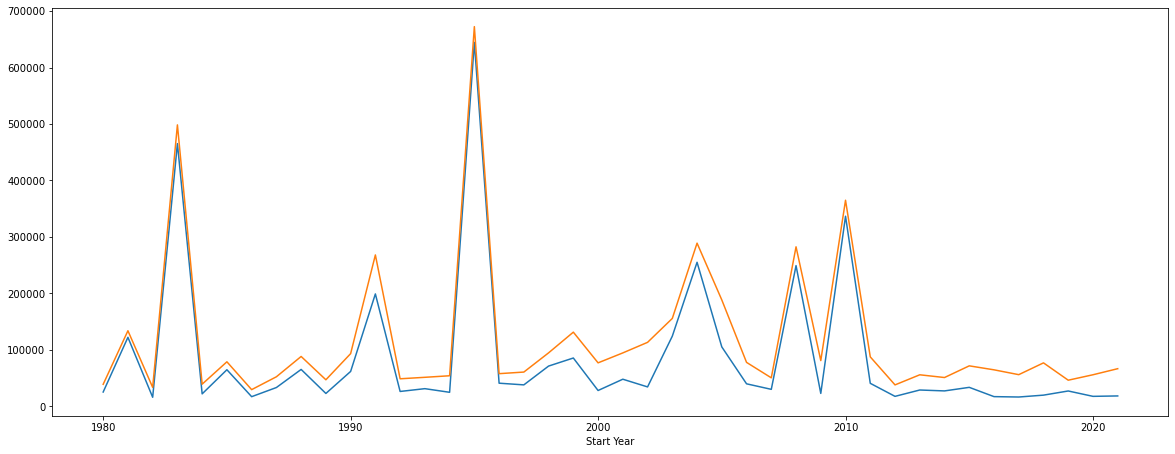

In [326]:
#total deaths
fig = plt.subplots(figsize=(20,7.5))
display(df[df['Start Year']>=1980].groupby('Start Year').sum()['Total Deaths'].plot())
display(final2.groupby('Start Year').sum()['Total Deaths'].plot())

<AxesSubplot:xlabel='Start Year'>

<AxesSubplot:xlabel='Start Year'>

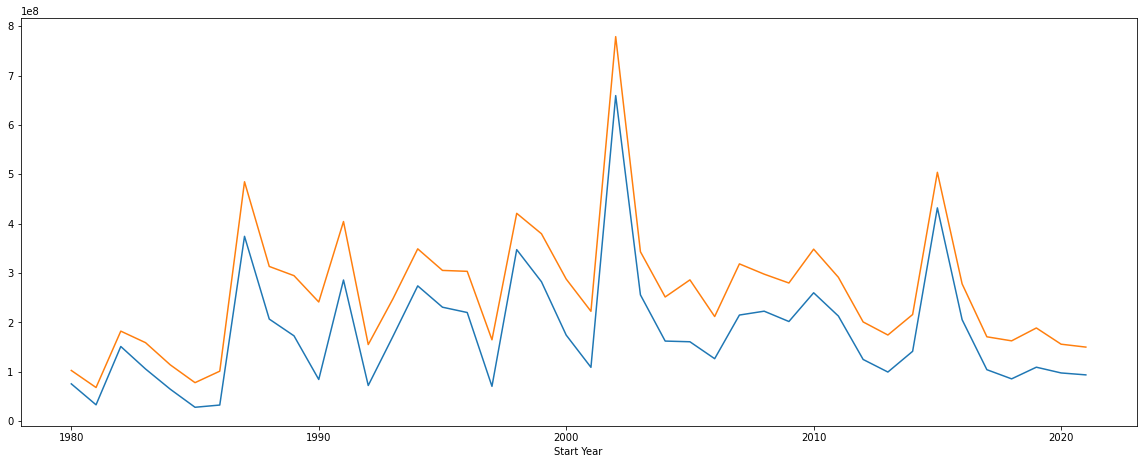

In [327]:
#total affected
fig = plt.subplots(figsize=(20,7.5))
display(df[df['Start Year']>=1980].groupby('Start Year').sum()['Total Affected'].plot())
display(final2.groupby('Start Year').sum()['Total Affected'].plot())

<AxesSubplot:xlabel='Start Year'>

<AxesSubplot:xlabel='Start Year'>

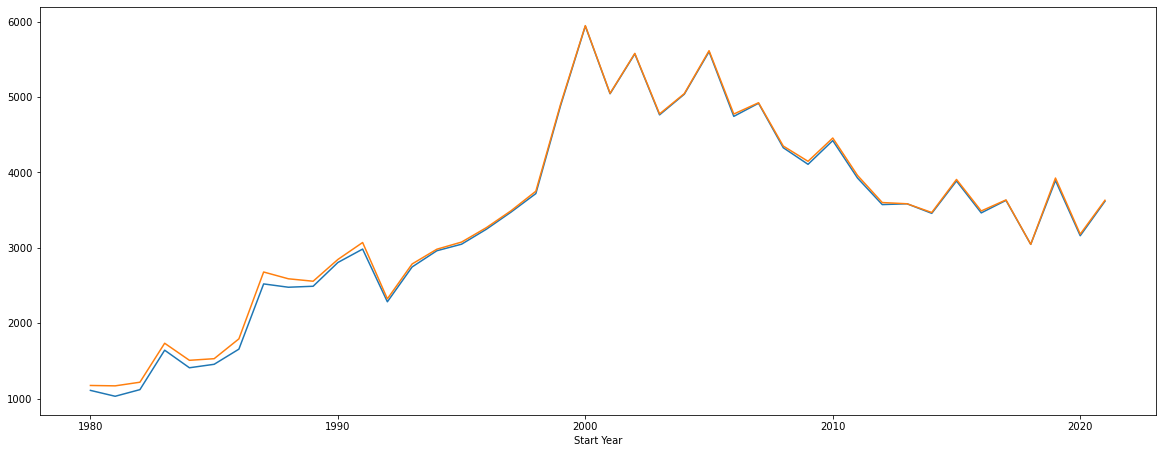

In [328]:
#start month
fig = plt.subplots(figsize=(20,7.5))
display(df[df['Start Year']>=1980].groupby('Start Year').sum()['Start Month'].plot())
display(final2.groupby('Start Year').sum()['Start Month'].plot())

<AxesSubplot:xlabel='Country'>

<AxesSubplot:xlabel='Country'>

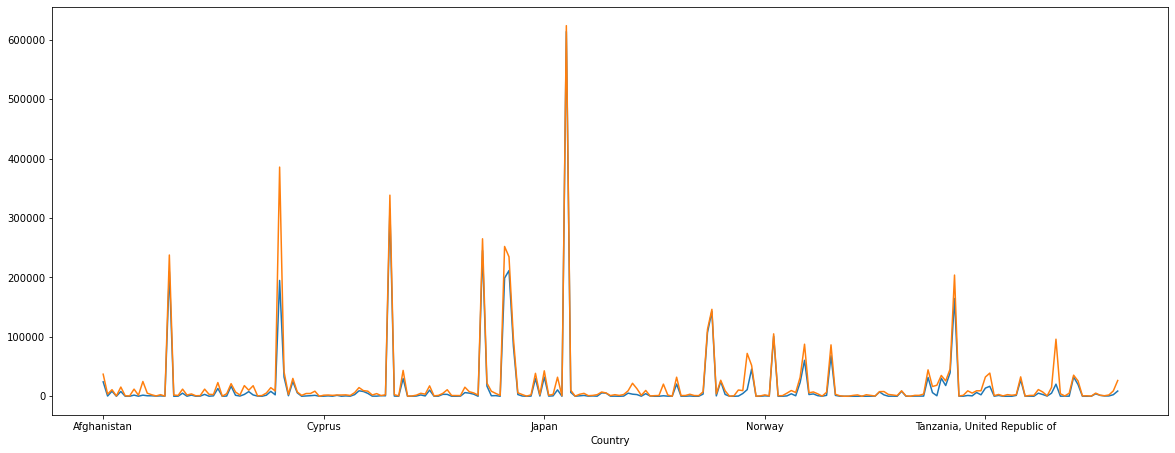

In [329]:
fig = plt.subplots(figsize=(20,7.5))
display(df[df['Start Year']>=1980].groupby('Country').sum()['Total Deaths'].plot())
display(final2.groupby('Country').sum()['Total Deaths'].plot())

<AxesSubplot:xlabel='Disaster Group'>

<AxesSubplot:xlabel='Disaster Group'>

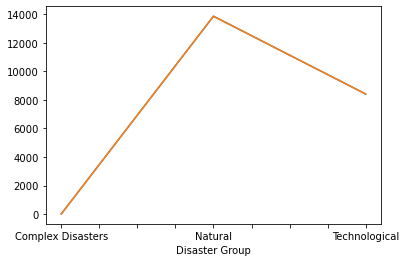

In [330]:
display(df[df['Start Year']>=1980].groupby('Disaster Group').count()['Year'].plot())
display(final2.groupby('Disaster Group').count()['Year'].plot())

It seems that the imputation understabdably led to more deaths and total affected to increase for every year.

It also seems that countries that were affected more on average got more deaths imputed, which likely led to countries who don't report much due to lack of resources being underrepresented. 

## Creating the time series and per country basis
### Time Series

In [352]:
final2['Start Month'] = round(final2['Start Month'],0)
final2['End Month'] = round(final2['Start Month'],0)
year_sum = final2.groupby('Start Year').sum()[['Total Deaths','Total Affected','CPI']]
year_mean = final2.groupby('Start Year').mean()[['Start Month','End Month','End Year']]
year_count = final2.groupby('Start Year').count()['Year']
year_total = year_sum.join(year_mean).join(year_count).rename({'Year':'Frequency'},axis=1)
year_total.to_csv('year_total.csv')

### Country

In [358]:
country_sum = final2.groupby('Country').sum()[['Total Deaths','Total Affected','CPI']]
country_mean = final2.groupby('Country').mean()[['Start Month','End Month','Start Year','End Year']]
country_count = final2.groupby('Country').count()['Year']
country_total = country_sum.join(country_mean).join(country_count).rename({'Year':'Frequency'},axis=1)
country_total.to_csv('country_total.csv')

### Panel

In [362]:
panel_sum = final2.groupby(['Country','Start Year']).sum()[['Total Deaths','Total Affected','CPI']]
panel_mean = final2.groupby(['Country','Start Year']).mean()[['Start Month','End Month','End Year']]
panel_count = final2.groupby(['Country','Start Year']).count()['Year']
panel_total = panel_sum.join(panel_mean).join(panel_count).rename({'Year':'Frequency'},axis=1)
panel_total.to_csv('panel_total.csv')